In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Para visualizaciones
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Para preprocesamiento
# -----------------------------------------------------------------------
import contractions
import re
import nltk
import spacy
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Para las redes neuronales
# -----------------------------------------------------------------------
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from keras_tuner import RandomSearch

# Configuración de pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('datos/spam.csv')
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Función para limpiar

In [3]:
def limpiar_texto(text, stop_words, nlp):
    # Expandir contracciones
    text = contractions.fix(text)  # Convierte "don't" -> "do not"
    
    # Limpieza de texto
    text = text.lower()  # convertimos a minúsculas
    text = re.sub(r'[^\w\s]', '', text)  # eliminamos los signos de puntuación puntuación
    text = re.sub(r'\d+', '', text)  # eliminamos los  números
    text = re.sub(r'\s+', ' ', text)  # reemplazamos múltiples espacios o saltos de línea por un espacio
    text = text.strip()  # quitamos espacios en blanco al inicio y al final
    doc = nlp(text)  # tokenizamos el texto
    tokens = [token.lemma_ for token in doc if token.text not in stop_words]
    return " ".join(tokens)

In [4]:
df.shape

(5574, 2)

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(5574, 2)

In [7]:
label_counts = df['Class'].value_counts(normalize=True).round(2) * 100
label_counts

Class
ham     87.0
spam    13.0
Name: proportion, dtype: float64

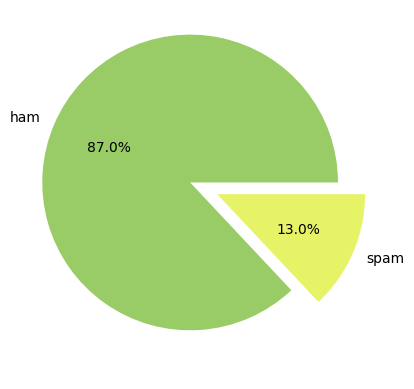

In [8]:
explode = [0.2,0] # separa de mi chart
colors = cm.summer([0.6,0.9])

plt.pie(
    label_counts,
    labels = df['Class'].unique(),
    autopct='%0.1f%%', #con un decimal, que tome los porcentajes de mi labels
    explode=explode,
    colors=colors
);

In [9]:
nlp = spacy.load('en_core_web_sm') #tokenizo para eliminar palabras 

stop_words = set(stopwords.words('english'))

In [10]:
df['mensaje_limpio'] = df.apply(lambda x: limpiar_texto(x['Message'], stop_words, nlp), axis=1)


In [11]:
df.head()

,Class,Message,mensaje_limpio
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live around though


In [12]:
vect_td = TfidfVectorizer(max_features=1000)

df_vect= pd.DataFrame(vect_td.fit_transform(df['mensaje_limpio']).toarray(), columns=vect_td.get_feature_names_out())


In [13]:
df_vect.head()

,abiola,able,accept,access,account,across,actually,add,address,admirer,aft,afternoon,age,ago,ah,aha,aight,air,al,alex,almost,alone,already,alright,also,always,amp,ampm,an,angry,another,answer,anymore,anyone,anything,anytime,anyway,apartment,app,apply,appreciate,ard,area,around,arrive,ask,askd,ass,attempt,auction,available,ave,await,award,away,awesome,babe,baby,back,bad,bag,bak,bank,bath,bathe,bb,bcoz,bday,bear,beautiful,become,bed,believe,bid,big,bill,birthday,bit,blue,bluetooth,bold,bonus,book,bore,bored,boss,bother,bout,box,boy,boytoy,break,bring,brother,bslvyl,bt,btnationalrate,buck,bugis,bus,busy,buy,call,caller,callertune,camcorder,camera,cancel,car,card,care,carlos,case,cash,cashbalance,cashin,catch,cd,chance,change,character,charge,charity,chat,cheap,check,cheer,chennai,chikku,child,choose,christmas,cinema,claim,class,clean,clear,close,club,code,coffee,colleague,collect,collection,college,colour,come,comin,comp,company,complete,completely,complimentary,computer,confirm,congrat,congratulation,contact,content,convey,cook,cool,copy,correct,cos,cost,costa,could,country,couple,course,cover,coz,cr,crave,crazy,credit,croydon,cry,cs,cum,cup,currently,custcare,customer,cut,cute,da,dad,daddy,darlin,darren,dat,date,day,de,dead,deal,dear,decide,deep,del,deliver,delivery,den,detail,die,different,difficult,digital,din,dinner,direct,dis,discount,discuss,disturb,dnt,do,doctor,dog,doin,door,double,download,draw,dream,drink,drive,drop,drug,dude,dun,dvd,early,easy,eat,eatin,eg,eh,either,else,email,empty,end,energy,england,enjoy,enough,enter,entry,especially,etc,euro,eve,even,evening,ever,every,everyone,everything,ex,exam,excellent,excuse,expect,experience,expire,extra,eye,face,facebook,fact,fall,family,fancy,fantastic,fantasy,far,fast,fat,father,feel,fight,figure,file,fill,film,final,finally,find,fine,finger,finish,first,fix,flag,flight,flirt,flower,follow,fone,food,forever,forget,forward,fr,free,freemsg,freephone,fren,fri,friday,friend,friendship,frm,frnd,fuck,fucking,full,fun,funny,future,gal,game,gap,gas,gay,gd,get,gettin,gift,girl,give,glad,go,god,goin,good,goodmorning,goodnight,goto,gr,great,grin,gt,guarantee,gud,guess,guy,gym,ha,haf,haha,hair,half,hand,happen,happiness,happy,hard,hav,head,hear,heart,hee,hello,help,hey,hgsuiteland,hi,high,hit,hiya,hl,hmm,hmmm,hmv,ho,hold,holiday,home,hope,horny,hospital,hot,hotel,hour,house,however,hr,hrs,hug,huh,hungry,hurry,hurt,ice,idea,identifi,il,ill,immediately,important,inc,india,info,inform,information,inside,instead,insurance,invite,ipod,ish,issue,izzit,jay,job,john,join,joke,joy,jus,juz,kate,kb,keep,key,ki,kick,kid,kill,kind,king,kiss,know,knw,la,lady,land,landline,laptop,lar,last,late,later,laugh,lay,lazy,ldn,lead,learn,least,leave,lect,leh,lei,less,lesson,let,letter,liao,library,life,lift,light,like,line,link,list,listen,little,live,load,loan,location,log,lol,long,look,lor,lose,lot,lovable,love,lovely,lover,loyalty,ltd,ltdecimalgt,ltgt,lttimegt,luck,lucky,lunch,mah,mail,make,man,many,march,mark,marry,match,mate,may,mayb,maybe,mean,med,medical,meet,meeting,meh,mei,member,menu,merry,message,mid,might,min,mind,mine,minute,miracle,miss,mistake,mm,mo,mob,mobile,mobileupd,mode,mom,moment,mon,monday,money,month,mood,moon,morning,motorola,move,movie,mp,mr,mrng,mrt,mth,mu,much,mum,murder,music,must,muz,na,nah,name,national,nd,near,need,network,neva,never,new,news,next,ni,nice,nigeria,night,nite,nobody,noe,nokia,none,noon,nope,normal,not,nothing,ntt,number,nyt,offer,office,oh,ok,okay,okie,old,omg,omw,one,online,oops,open,operator,opinion,opt,optout,orange,orchard,order,oredi,oso,other,otherwise,outside,pa,page,pain,paper,parent,park,part,party,pass,pay,pc,people,per,person,pete,phone,photo,pic,pick,picture,pizza,place,plan,play,player,please,pleasure,pls,plus,plz,pm,pmessage,pmin,po,pobox,point,police,poly,poor,pop,possible,post,pound,power,ppm,pray,present,press,pretty,price,princess,private,prize,prob,probably,problem,project,promise,pub,put,question,quick,quite,quiz,quote,rain,rate,rcvd,rd,reach

In [14]:
df_vect.insert(0,'Class', df['Class'])
df_vect.head()

,Class,abiola,able,accept,access,account,across,actually,add,address,admirer,aft,afternoon,age,ago,ah,aha,aight,air,al,alex,almost,alone,already,alright,also,always,amp,ampm,an,angry,another,answer,anymore,anyone,anything,anytime,anyway,apartment,app,apply,appreciate,ard,area,around,arrive,ask,askd,ass,attempt,auction,available,ave,await,award,away,awesome,babe,baby,back,bad,bag,bak,bank,bath,bathe,bb,bcoz,bday,bear,beautiful,become,bed,believe,bid,big,bill,birthday,bit,blue,bluetooth,bold,bonus,book,bore,bored,boss,bother,bout,box,boy,boytoy,break,bring,brother,bslvyl,bt,btnationalrate,buck,bugis,bus,busy,buy,call,caller,callertune,camcorder,camera,cancel,car,card,care,carlos,case,cash,cashbalance,cashin,catch,cd,chance,change,character,charge,charity,chat,cheap,check,cheer,chennai,chikku,child,choose,christmas,cinema,claim,class,clean,clear,close,club,code,coffee,colleague,collect,collection,college,colour,come,comin,comp,company,complete,completely,complimentary,computer,confirm,congrat,congratulation,contact,content,convey,cook,cool,copy,correct,cos,cost,costa,could,country,couple,course,cover,coz,cr,crave,crazy,credit,croydon,cry,cs,cum,cup,currently,custcare,customer,cut,cute,da,dad,daddy,darlin,darren,dat,date,day,de,dead,deal,dear,decide,deep,del,deliver,delivery,den,detail,die,different,difficult,digital,din,dinner,direct,dis,discount,discuss,disturb,dnt,do,doctor,dog,doin,door,double,download,draw,dream,drink,drive,drop,drug,dude,dun,dvd,early,easy,eat,eatin,eg,eh,either,else,email,empty,end,energy,england,enjoy,enough,enter,entry,especially,etc,euro,eve,even,evening,ever,every,everyone,everything,ex,exam,excellent,excuse,expect,experience,expire,extra,eye,face,facebook,fact,fall,family,fancy,fantastic,fantasy,far,fast,fat,father,feel,fight,figure,file,fill,film,final,finally,find,fine,finger,finish,first,fix,flag,flight,flirt,flower,follow,fone,food,forever,forget,forward,fr,free,freemsg,freephone,fren,fri,friday,friend,friendship,frm,frnd,fuck,fucking,full,fun,funny,future,gal,game,gap,gas,gay,gd,get,gettin,gift,girl,give,glad,go,god,goin,good,goodmorning,goodnight,goto,gr,great,grin,gt,guarantee,gud,guess,guy,gym,ha,haf,haha,hair,half,hand,happen,happiness,happy,hard,hav,head,hear,heart,hee,hello,help,hey,hgsuiteland,hi,high,hit,hiya,hl,hmm,hmmm,hmv,ho,hold,holiday,home,hope,horny,hospital,hot,hotel,hour,house,however,hr,hrs,hug,huh,hungry,hurry,hurt,ice,idea,identifi,il,ill,immediately,important,inc,india,info,inform,information,inside,instead,insurance,invite,ipod,ish,issue,izzit,jay,job,john,join,joke,joy,jus,juz,kate,kb,keep,key,ki,kick,kid,kill,kind,king,kiss,know,knw,la,lady,land,landline,laptop,lar,last,late,later,laugh,lay,lazy,ldn,lead,learn,least,leave,lect,leh,lei,less,lesson,let,letter,liao,library,life,lift,light,like,line,link,list,listen,little,live,load,loan,location,log,lol,long,look,lor,lose,lot,lovable,love,lovely,lover,loyalty,ltd,ltdecimalgt,ltgt,lttimegt,luck,lucky,lunch,mah,mail,make,man,many,march,mark,marry,match,mate,may,mayb,maybe,mean,med,medical,meet,meeting,meh,mei,member,menu,merry,message,mid,might,min,mind,mine,minute,miracle,miss,mistake,mm,mo,mob,mobile,mobileupd,mode,mom,moment,mon,monday,money,month,mood,moon,morning,motorola,move,movie,mp,mr,mrng,mrt,mth,mu,much,mum,murder,music,must,muz,na,nah,name,national,nd,near,need,network,neva,never,new,news,next,ni,nice,nigeria,night,nite,nobody,noe,nokia,none,noon,nope,normal,not,nothing,ntt,number,nyt,offer,office,oh,ok,okay,okie,old,omg,omw,one,online,oops,open,operator,opinion,opt,optout,orange,orchard,order,oredi,oso,other,otherwise,outside,pa,page,pain,paper,parent,park,part,party,pass,pay,pc,people,per,person,pete,phone,photo,pic,pick,picture,pizza,place,plan,play,player,please,pleasure,pls,plus,plz,pm,pmessage,pmin,po,pobox,point,police,poly,poor,pop,possible,post,pound,power,ppm,pray,present,press,pretty,price,princess,private,prize,prob,probably,problem,project,promise,pub,put,question,quick,quite,quiz,quote,rain,rate,rcvd,rd

In [15]:
mapa = {'ham':0,
        'spam':1}
df_vect['Class'] = df_vect['Class'].map(mapa)
df_vect['Class'].unique()

array([0, 1])

In [16]:
df_vect.head()

,Class,abiola,able,accept,access,account,across,actually,add,address,admirer,aft,afternoon,age,ago,ah,aha,aight,air,al,alex,almost,alone,already,alright,also,always,amp,ampm,an,angry,another,answer,anymore,anyone,anything,anytime,anyway,apartment,app,apply,appreciate,ard,area,around,arrive,ask,askd,ass,attempt,auction,available,ave,await,award,away,awesome,babe,baby,back,bad,bag,bak,bank,bath,bathe,bb,bcoz,bday,bear,beautiful,become,bed,believe,bid,big,bill,birthday,bit,blue,bluetooth,bold,bonus,book,bore,bored,boss,bother,bout,box,boy,boytoy,break,bring,brother,bslvyl,bt,btnationalrate,buck,bugis,bus,busy,buy,call,caller,callertune,camcorder,camera,cancel,car,card,care,carlos,case,cash,cashbalance,cashin,catch,cd,chance,change,character,charge,charity,chat,cheap,check,cheer,chennai,chikku,child,choose,christmas,cinema,claim,class,clean,clear,close,club,code,coffee,colleague,collect,collection,college,colour,come,comin,comp,company,complete,completely,complimentary,computer,confirm,congrat,congratulation,contact,content,convey,cook,cool,copy,correct,cos,cost,costa,could,country,couple,course,cover,coz,cr,crave,crazy,credit,croydon,cry,cs,cum,cup,currently,custcare,customer,cut,cute,da,dad,daddy,darlin,darren,dat,date,day,de,dead,deal,dear,decide,deep,del,deliver,delivery,den,detail,die,different,difficult,digital,din,dinner,direct,dis,discount,discuss,disturb,dnt,do,doctor,dog,doin,door,double,download,draw,dream,drink,drive,drop,drug,dude,dun,dvd,early,easy,eat,eatin,eg,eh,either,else,email,empty,end,energy,england,enjoy,enough,enter,entry,especially,etc,euro,eve,even,evening,ever,every,everyone,everything,ex,exam,excellent,excuse,expect,experience,expire,extra,eye,face,facebook,fact,fall,family,fancy,fantastic,fantasy,far,fast,fat,father,feel,fight,figure,file,fill,film,final,finally,find,fine,finger,finish,first,fix,flag,flight,flirt,flower,follow,fone,food,forever,forget,forward,fr,free,freemsg,freephone,fren,fri,friday,friend,friendship,frm,frnd,fuck,fucking,full,fun,funny,future,gal,game,gap,gas,gay,gd,get,gettin,gift,girl,give,glad,go,god,goin,good,goodmorning,goodnight,goto,gr,great,grin,gt,guarantee,gud,guess,guy,gym,ha,haf,haha,hair,half,hand,happen,happiness,happy,hard,hav,head,hear,heart,hee,hello,help,hey,hgsuiteland,hi,high,hit,hiya,hl,hmm,hmmm,hmv,ho,hold,holiday,home,hope,horny,hospital,hot,hotel,hour,house,however,hr,hrs,hug,huh,hungry,hurry,hurt,ice,idea,identifi,il,ill,immediately,important,inc,india,info,inform,information,inside,instead,insurance,invite,ipod,ish,issue,izzit,jay,job,john,join,joke,joy,jus,juz,kate,kb,keep,key,ki,kick,kid,kill,kind,king,kiss,know,knw,la,lady,land,landline,laptop,lar,last,late,later,laugh,lay,lazy,ldn,lead,learn,least,leave,lect,leh,lei,less,lesson,let,letter,liao,library,life,lift,light,like,line,link,list,listen,little,live,load,loan,location,log,lol,long,look,lor,lose,lot,lovable,love,lovely,lover,loyalty,ltd,ltdecimalgt,ltgt,lttimegt,luck,lucky,lunch,mah,mail,make,man,many,march,mark,marry,match,mate,may,mayb,maybe,mean,med,medical,meet,meeting,meh,mei,member,menu,merry,message,mid,might,min,mind,mine,minute,miracle,miss,mistake,mm,mo,mob,mobile,mobileupd,mode,mom,moment,mon,monday,money,month,mood,moon,morning,motorola,move,movie,mp,mr,mrng,mrt,mth,mu,much,mum,murder,music,must,muz,na,nah,name,national,nd,near,need,network,neva,never,new,news,next,ni,nice,nigeria,night,nite,nobody,noe,nokia,none,noon,nope,normal,not,nothing,ntt,number,nyt,offer,office,oh,ok,okay,okie,old,omg,omw,one,online,oops,open,operator,opinion,opt,optout,orange,orchard,order,oredi,oso,other,otherwise,outside,pa,page,pain,paper,parent,park,part,party,pass,pay,pc,people,per,person,pete,phone,photo,pic,pick,picture,pizza,place,plan,play,player,please,pleasure,pls,plus,plz,pm,pmessage,pmin,po,pobox,point,police,poly,poor,pop,possible,post,pound,power,ppm,pray,present,press,pretty,price,princess,private,prize,prob,probably,problem,project,promise,pub,put,question,quick,quite,quiz,quote,rain,rate,rcvd,rd

In [17]:
x = df_vect.drop('Class', axis=1)
y = df_vect['Class']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [18]:
def construir_modelo(hp):
    model = tf.keras.Sequential()

    model.add(
        layers.Dense(
            units = hp.Int('units', min_value = 16, max_value = 130, step = 15),
            activation = hp.Choice('activation', values = ['relu', 'tanh']),
            input_shape = (x_train.shape[1])
        )
    )

    model.add(
        layers.Dense(1, activation='sigmoid') # el 1 indica que es salida
    )

    model.compile(
        optimizer = hp.Choice('optimizer', values = ['adam', 'sgd']),
        loss = 'binary_crossentropy',
        metric = ['accuracy']
    )

    return model 

tunner = RandomSearch(
    construir_modelo,
    objective = 'val_accuracy',
    executions_per_trial= 2, # parecido al cross validation (cuantas veces quiero que pasen los datos por la red)
    directory = 'mis_modelos',
    project_name = 'grid_search_demo' )

tunner.search(x_train,
              y_train,
              validation_data = (x_test, y_test),
              epochs= 10)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Cannot convert '1000' to a shape.

In [19]:
def construir_modelo(hp):

    model = tf.keras.Sequential()

    model.add(layers.Dense(
        units = hp.Int("units", min_value = 15, max_value = 130, step = 15), 
        activation = hp.Choice("activation", values = ["relu", "tanh"]),
        input_shape = (x_train.shape[1],)))
    
    model.add(layers.Dense(1, activation = "sigmoid"))

    model.compile(
        optimizer = hp.Choice("optimizer", values = ["adam", "sgd"]), 
        loss = "binary_crossentropy", 
        metrics = ["accuracy"])
    
    return model

tunner = RandomSearch(
            construir_modelo, 
            objective="val_accuracy", 
            executions_per_trial = 2, 
            directory = "mis_modelos",
            project_name = "grid_search_demo" )

tunner.search(x_train, 
              y_train, 
              validation_data = (x_test, y_test), 
              epochs = 10)

Trial 10 Complete [00h 00m 12s]
val_accuracy: 0.8556053638458252

Best val_accuracy So Far: 0.9811659455299377
Total elapsed time: 00h 02m 13s


In [20]:
best_hiperpar = tunner.get_best_hyperparameters()[0]
best_hiperpar.get('activation') # para ver el activation

'relu'

In [21]:
best_hiperpar.get('units') #neuronas

75

In [22]:
best_hiperpar.get('optimizer')

'adam'

In [23]:
mejor_modelo = tunner.hypermodel.build(best_hiperpar) #toma los mejores hiperparámetros
final = mejor_modelo.fit(x,y)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8350 - loss: 0.5328


In [24]:
reentrena = mejor_modelo.fit(x_train,y_train, validation_data = (x_test, y_test))

140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9649 - loss: 0.1452 - val_accuracy: 0.9758 - val_loss: 0.0898


In [25]:
# m_model = tunner.get_best_models()[0] es lo mismo que los pasos anteriores

In [26]:
nueva_frase = 'Good Morning! We are learning neural networks'
nueva_frase_limpia = limpiar_texto(nueva_frase, stop_words, nlp)
frase_predecir = vect_td.transform([nueva_frase_limpia])


In [27]:
nueva_frase_limpia

'good morning learn neural network'

In [28]:
pd.DataFrame(frase_predecir.toarray(), columns=vect_td.get_feature_names_out())

,abiola,able,accept,access,account,across,actually,add,address,admirer,aft,afternoon,age,ago,ah,aha,aight,air,al,alex,almost,alone,already,alright,also,always,amp,ampm,an,angry,another,answer,anymore,anyone,anything,anytime,anyway,apartment,app,apply,appreciate,ard,area,around,arrive,ask,askd,ass,attempt,auction,available,ave,await,award,away,awesome,babe,baby,back,bad,bag,bak,bank,bath,bathe,bb,bcoz,bday,bear,beautiful,become,bed,believe,bid,big,bill,birthday,bit,blue,bluetooth,bold,bonus,book,bore,bored,boss,bother,bout,box,boy,boytoy,break,bring,brother,bslvyl,bt,btnationalrate,buck,bugis,bus,busy,buy,call,caller,callertune,camcorder,camera,cancel,car,card,care,carlos,case,cash,cashbalance,cashin,catch,cd,chance,change,character,charge,charity,chat,cheap,check,cheer,chennai,chikku,child,choose,christmas,cinema,claim,class,clean,clear,close,club,code,coffee,colleague,collect,collection,college,colour,come,comin,comp,company,complete,completely,complimentary,computer,confirm,congrat,congratulation,contact,content,convey,cook,cool,copy,correct,cos,cost,costa,could,country,couple,course,cover,coz,cr,crave,crazy,credit,croydon,cry,cs,cum,cup,currently,custcare,customer,cut,cute,da,dad,daddy,darlin,darren,dat,date,day,de,dead,deal,dear,decide,deep,del,deliver,delivery,den,detail,die,different,difficult,digital,din,dinner,direct,dis,discount,discuss,disturb,dnt,do,doctor,dog,doin,door,double,download,draw,dream,drink,drive,drop,drug,dude,dun,dvd,early,easy,eat,eatin,eg,eh,either,else,email,empty,end,energy,england,enjoy,enough,enter,entry,especially,etc,euro,eve,even,evening,ever,every,everyone,everything,ex,exam,excellent,excuse,expect,experience,expire,extra,eye,face,facebook,fact,fall,family,fancy,fantastic,fantasy,far,fast,fat,father,feel,fight,figure,file,fill,film,final,finally,find,fine,finger,finish,first,fix,flag,flight,flirt,flower,follow,fone,food,forever,forget,forward,fr,free,freemsg,freephone,fren,fri,friday,friend,friendship,frm,frnd,fuck,fucking,full,fun,funny,future,gal,game,gap,gas,gay,gd,get,gettin,gift,girl,give,glad,go,god,goin,good,goodmorning,goodnight,goto,gr,great,grin,gt,guarantee,gud,guess,guy,gym,ha,haf,haha,hair,half,hand,happen,happiness,happy,hard,hav,head,hear,heart,hee,hello,help,hey,hgsuiteland,hi,high,hit,hiya,hl,hmm,hmmm,hmv,ho,hold,holiday,home,hope,horny,hospital,hot,hotel,hour,house,however,hr,hrs,hug,huh,hungry,hurry,hurt,ice,idea,identifi,il,ill,immediately,important,inc,india,info,inform,information,inside,instead,insurance,invite,ipod,ish,issue,izzit,jay,job,john,join,joke,joy,jus,juz,kate,kb,keep,key,ki,kick,kid,kill,kind,king,kiss,know,knw,la,lady,land,landline,laptop,lar,last,late,later,laugh,lay,lazy,ldn,lead,learn,least,leave,lect,leh,lei,less,lesson,let,letter,liao,library,life,lift,light,like,line,link,list,listen,little,live,load,loan,location,log,lol,long,look,lor,lose,lot,lovable,love,lovely,lover,loyalty,ltd,ltdecimalgt,ltgt,lttimegt,luck,lucky,lunch,mah,mail,make,man,many,march,mark,marry,match,mate,may,mayb,maybe,mean,med,medical,meet,meeting,meh,mei,member,menu,merry,message,mid,might,min,mind,mine,minute,miracle,miss,mistake,mm,mo,mob,mobile,mobileupd,mode,mom,moment,mon,monday,money,month,mood,moon,morning,motorola,move,movie,mp,mr,mrng,mrt,mth,mu,much,mum,murder,music,must,muz,na,nah,name,national,nd,near,need,network,neva,never,new,news,next,ni,nice,nigeria,night,nite,nobody,noe,nokia,none,noon,nope,normal,not,nothing,ntt,number,nyt,offer,office,oh,ok,okay,okie,old,omg,omw,one,online,oops,open,operator,opinion,opt,optout,orange,orchard,order,oredi,oso,other,otherwise,outside,pa,page,pain,paper,parent,park,part,party,pass,pay,pc,people,per,person,pete,phone,photo,pic,pick,picture,pizza,place,plan,play,player,please,pleasure,pls,plus,plz,pm,pmessage,pmin,po,pobox,point,police,poly,poor,pop,possible,post,pound,power,ppm,pray,present,press,pretty,price,princess,private,prize,prob,probably,problem,project,promise,pub,put,question,quick,quite,quiz,quote,rain,rate,rcvd,rd,reach

In [29]:
mejor_modelo.predict(pd.DataFrame(frase_predecir.toarray(), columns=vect_td.get_feature_names_out()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


array([[0.08591907]], dtype=float32)

Probabilidad de que sea 1

Me dice que no es spam